In [50]:
from multi_armed_bandit import Env
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [2]:
env = Env(N=3, probs=(0.2, 0.3, 0.5), rewards=(0, 1), max_game_num=200, win_num=25)

# Run simulation with random agent

In [3]:
def random_policy(action_space):
    return np.random.choice(action_space)

In [38]:
def run_simulation_random(env, policy, epochs=50):
    acc_rewards = []

    for i in range(epochs):
        env.reset()

        acc_reward = 0
        done = False
        while not done:
            action = policy(env.action_space)

            observation, reward, terminated, truncated, info = env.step(action)
            acc_reward += reward

            done = terminated or truncated

        acc_rewards.append(acc_reward)
    
    return acc_rewards

In [41]:
acc_rewards = run_simulation_random(env, random_policy, epochs=100)
print(f"Average accumulated reward: {sum(acc_rewards)/len(acc_rewards)}")

Average accumulated reward: 132.73


# Run simulation with $\epsilon$-greedy agents

In [59]:
def eps_greedy_policy(action_space, eps, probs):
    r = random()
    if r < eps or not np.any(probs):
        return random_policy(action_space)
    else:
        return np.argmax(probs)

In [60]:
def run_simulation_greedy(env, policy, epochs=50):
    acc_rewards = []

    for i in range(epochs):
        env.reset()

        acc_reward = 0
        done = False
        probs = [0 for i in range(env.N)]
        while not done:
            action = policy(env.action_space, probs=probs)

            observation, reward, terminated, truncated, info = env.step(action)
            acc_reward += reward
            probs[action] += reward

            done = terminated or truncated

        acc_rewards.append(acc_reward)
    
    return acc_rewards

In [61]:
eps = 0.4
greedy_policy = lambda action_space, probs: eps_greedy_policy(action_space, eps, probs)

acc_rewards = run_simulation_greedy(env, greedy_policy, epochs=100)
print(f"Average accumulated reward: {sum(acc_rewards)/len(acc_rewards)}")

Average accumulated reward: 141.4


In [62]:
avg_acc_rewards = []
eps_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epochs = 100

for eps in eps_vals:
    greedy_policy = lambda action_space, probs: eps_greedy_policy(action_space, eps, probs)

    acc_rewards = run_simulation_greedy(env, greedy_policy, epochs=epochs)
    avg_acc_reward = sum(acc_rewards)/len(acc_rewards)

    avg_acc_rewards.append(avg_acc_reward)

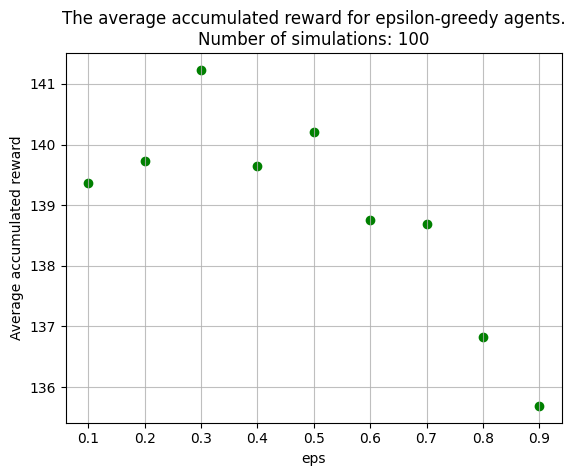

In [63]:
plt.scatter(eps_vals, avg_acc_rewards, c="green")
plt.grid(alpha=0.8)
plt.title(f"The average accumulated reward for epsilon-greedy agents.\nNumber of simulations: {epochs}")
plt.xlabel("eps")
plt.ylabel("Average accumulated reward")
plt.show()

# Run simulation with probability following agent

In [64]:
def prob_follow_policy(action_space, eps, probs):
    probs = np.array(probs)

    r = random()
    if r < eps or not np.any(probs):
        return random_policy(action_space)
    else:
        probs = probs/sum(probs)
        return np.random.choice(action_space, p=probs)

In [65]:
def run_simulation_greedy(env, policy, epochs=50):
    acc_rewards = []

    for i in range(epochs):
        env.reset()

        acc_reward = 0
        done = False
        probs = [0 for i in range(env.N)]
        while not done:
            action = policy(env.action_space, probs=probs)

            observation, reward, terminated, truncated, info = env.step(action)
            acc_reward += reward
            probs[action] += reward

            done = terminated or truncated

        acc_rewards.append(acc_reward)
    
    return acc_rewards

In [66]:
eps = 0.4
follow_policy = lambda action_space, probs: prob_follow_policy(action_space, eps, probs)

acc_rewards = run_simulation_greedy(env, follow_policy, epochs=100)
print(f"Average accumulated reward: {sum(acc_rewards)/len(acc_rewards)}")

Average accumulated reward: 136.4


In [72]:
avg_acc_rewards_3 = []
eps_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epochs = 100

for eps in eps_vals:
    follow_policy = lambda action_space, probs: prob_follow_policy(action_space, eps, probs)

    acc_rewards = run_simulation_greedy(env, follow_policy, epochs=epochs)
    avg_acc_reward = sum(acc_rewards)/len(acc_rewards)

    avg_acc_rewards_3.append(avg_acc_reward)

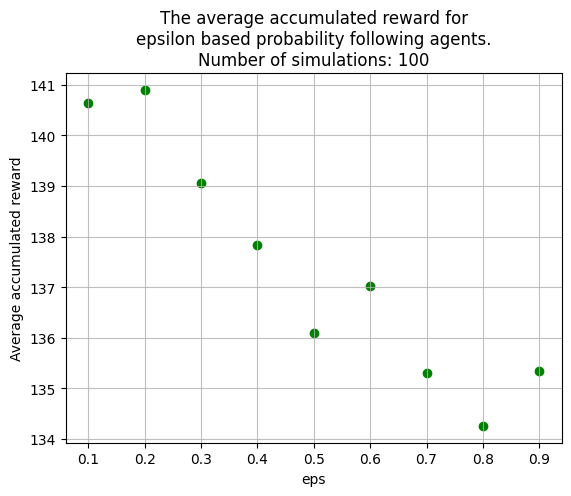

In [73]:
plt.scatter(eps_vals, avg_acc_rewards_3, c="green")
plt.grid(alpha=0.8)
plt.title(f"The average accumulated reward for\nepsilon based probability following agents.\nNumber of simulations: {epochs}")
plt.xlabel("eps")
plt.ylabel("Average accumulated reward")
plt.show()